In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
# Read ismr file 
ismr_fileName = "ljic219b15.20_.ismr"
df1 = pd.read_csv(ismr_fileName, header=None, squeeze=True)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,2117,350160,10,630,3.0,26.0,41.8,0.097,0.082,0.035,...,0.028,-9.506,0.127,2850,0.017,1.593,1.53,0.000147,0.000102,0.000061
1,2117,350160,12,630,61.0,14.0,40.5,0.147,0.094,0.032,...,nan,nan,nan,nan,nan,nan,nan,0.000128,0.000536,nan
2,2117,350160,18,630,169.0,64.0,49.0,0.043,0.036,0.013,...,0.017,-26.416,0.029,13210,0.006,0.609,1.51,0.000019,0.000018,0.000006
3,2117,350160,20,630,38.0,49.0,47.2,0.040,0.044,0.015,...,nan,nan,nan,nan,nan,nan,nan,0.000030,nan,nan
4,2117,350160,21,630,304.0,36.0,45.9,0.045,0.051,0.017,...,nan,nan,nan,nan,nan,nan,nan,0.000033,nan,nan


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 62 columns):
0     497 non-null int64
1     497 non-null int64
2     497 non-null int64
3     497 non-null int64
4     496 non-null float64
5     496 non-null float64
6     497 non-null float64
7     497 non-null float64
8     497 non-null float64
9     497 non-null float64
10    497 non-null float64
11    497 non-null float64
12    497 non-null object
13    497 non-null object
14    497 non-null float64
15    497 non-null float64
16    497 non-null object
17    497 non-null object
18    497 non-null object
19    497 non-null object
20    497 non-null object
21    497 non-null object
22    497 non-null object
23    497 non-null object
24    497 non-null object
25    497 non-null int64
26    497 non-null object
27    497 non-null object
28    497 non-null float64
29    497 non-null float64
30    497 non-null object
31    497 non-null object
32    497 non-null object
33    497 non-null object
34  

## Convert GPS to UTC time

In [4]:
# Convert GPS time: week & seconds; to UTC time.
# OJO: It's missing the leapseconds, these value get from the navigation file
def GPS2UTCtime(row):
    leapseconds = 0 # change
    gpsweek = int(row[0])
    gpsseconds = int(row[1])
    
    datetimeformat = "%Y-%m-%d %H:%M:%S"
    first_epoch = datetime.datetime.strptime("1980-01-06 00:00:00",datetimeformat)
    elapsed = datetime.timedelta(days=(gpsweek*7),seconds=(gpsseconds-leapseconds))
    
    return first_epoch + elapsed

In [5]:
newDate = df1[[0,1]].apply(GPS2UTCtime, axis=1)
newDate.head()

0   2020-08-06 01:16:00
1   2020-08-06 01:16:00
2   2020-08-06 01:16:00
3   2020-08-06 01:16:00
4   2020-08-06 01:16:00
dtype: datetime64[ns]

In [6]:
# Create the new column
df1.insert(0,column="DateTime",value=0)
df1["DateTime"] = newDate 

In [7]:
del df1[0]
del df1[1]

In [8]:
df1.head()

,DateTime,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
0,2020-08-06 01:16:00,10,630,3.0,26.0,41.8,0.097,0.082,0.035,0.040,...,0.028,-9.506,0.127,2850,0.017,1.593,1.53,0.000147,0.000102,0.000061
1,2020-08-06 01:16:00,12,630,61.0,14.0,40.5,0.147,0.094,0.032,0.036,...,nan,nan,nan,nan,nan,nan,nan,0.000128,0.000536,nan
2,2020-08-06 01:16:00,18,630,169.0,64.0,49.0,0.043,0.036,0.013,0.020,...,0.017,-26.416,0.029,13210,0.006,0.609,1.51,0.000019,0.000018,0.000006
3,2020-08-06 01:16:00,20,630,38.0,49.0,47.2,0.040,0.044,0.015,0.019,...,nan,nan,nan,nan,nan,nan,nan,0.000030,nan,nan
4,2020-08-06 01:16:00,21,630,304.0,36.0,45.9,0.045,0.051,0.017,0.021,...,nan,nan,nan,nan,nan,nan,nan,0.000033,nan,nan


## Convert SVID to PRN

In [9]:
# The PRNs code were obtained from PolaRx5S Reference Guide
def get_PRN(row):
    svid = int(row[1])
    if 1<=svid<=37:
        prn = "G"+str(svid)
    elif 38<=svid<=61:
        prn = "R"+str(svid-37)
    elif svid==62:
        prn = "NA"
    elif 63<=svid<=68:
        prn = "R"+str(svid-38)
    elif 71<=svid<=106:
        prn = "E"+str(svid-70)
    elif 107<=svid<=119:
        prn = "NA"
    elif 120<=svid<=140:
        prn = "S"+str(svid-100)
    elif 141<=svid<=177:
        prn = "C"+str(svid-140)
    elif 181<=svid<=187:
        prn = "J"+str(svid-180)
    elif 191<=svid<=197:
        prn = "I"+str(svid-190)
    elif 198<=svid<=215:
        prn = "S"+str(svid-157)
    elif 216<=svid<=222:
        prn = "I"+str(svid-208)
    else:
        prn = "svid not valid!"
    
    return prn

In [10]:
prn = df1.apply(get_PRN, axis=1)
prn.head()

0    G10
1    G12
2    G18
3    G20
4    G21
dtype: object

In [11]:
df1[2] = df1.apply(get_PRN, axis=1)

In [12]:
df1.rename(columns={2:"PRN"}, inplace=True)

In [13]:
df1.head()

,DateTime,PRN,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
0,2020-08-06 01:16:00,G10,630,3.0,26.0,41.8,0.097,0.082,0.035,0.040,...,0.028,-9.506,0.127,2850,0.017,1.593,1.53,0.000147,0.000102,0.000061
1,2020-08-06 01:16:00,G12,630,61.0,14.0,40.5,0.147,0.094,0.032,0.036,...,nan,nan,nan,nan,nan,nan,nan,0.000128,0.000536,nan
2,2020-08-06 01:16:00,G18,630,169.0,64.0,49.0,0.043,0.036,0.013,0.020,...,0.017,-26.416,0.029,13210,0.006,0.609,1.51,0.000019,0.000018,0.000006
3,2020-08-06 01:16:00,G20,630,38.0,49.0,47.2,0.040,0.044,0.015,0.019,...,nan,nan,nan,nan,nan,nan,nan,0.000030,nan,nan
4,2020-08-06 01:16:00,G21,630,304.0,36.0,45.9,0.045,0.051,0.017,0.021,...,nan,nan,nan,nan,nan,nan,nan,0.000033,nan,nan


In [23]:
list(df1.columns)

['DateTime',
 'PRN',
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61]

## Plot C/N 

In [14]:
df2 = df1[["DateTime", "PRN", 6, 31, 45]]
df2.head()

,DateTime,PRN,6,31,45
0,2020-08-06 01:16:00,G10,41.8,41.7,44.8
1,2020-08-06 01:16:00,G12,40.5,34.2,nan
2,2020-08-06 01:16:00,G18,49.0,49.5,54.1
3,2020-08-06 01:16:00,G20,47.2,nan,nan
4,2020-08-06 01:16:00,G21,45.9,nan,nan


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 5 columns):
DateTime    497 non-null datetime64[ns]
PRN         497 non-null object
6           497 non-null float64
31          497 non-null object
45          497 non-null object
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 19.5+ KB


In [16]:
df2[31] = df2[31].astype('float')

/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
df2[45] = df2[45].astype('float')

/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 5 columns):
DateTime    497 non-null datetime64[ns]
PRN         497 non-null object
6           497 non-null float64
31          338 non-null float64
45          189 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 19.5+ KB


In [19]:
df2.set_index("DateTime", inplace=True)

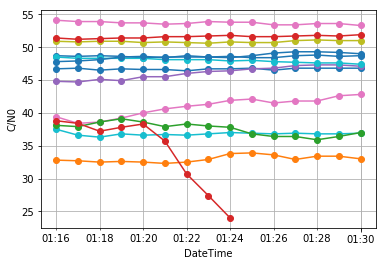

In [20]:
df2.groupby("PRN")[45].plot(style='o-')
plt.ylabel("C/N0")
plt.grid(which='both')
#plt.legend(loc="center right", ncol=7)
plt.savefig("fig_example.png")